In [1]:
'''
Name: Lauren Fisher
Assignment: KNN Predictor Project 3
Class: CS323 Machine Learning
Description: this program takes in wine data with quality targets from 1-10 and attempts to predict which 
wines will be rated good or bad quality (<6 or >6) through a KNN classifier
'''
#Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Split Data Train and Test
from sklearn.model_selection import train_test_split

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
def load_data():
    """
    This function reads in the wine quality data csv file into a pandas dataframe
    """
    train_data = pd.read_csv('winequality-red.csv')
    return pd.read_csv("winequality-red.csv")

In [3]:
def standardize_data(train_data):
    """
    This function standardizes the data frame (beside target) to be between 0 and 1 for each parameter

    Parameters
    ----------
    train_data : pandas data frame

    Returns
    -------
    pandas data frame

    """
    #Standardization
    from sklearn.preprocessing import StandardScaler
    std = StandardScaler()
    train_data.iloc[:,:-1]=std.fit_transform(train_data.iloc[:,:-1])
    return train_data

In [4]:
def pipe_data(train_data):
    """
    This function separates the overall data set into 0.88:0.22 components of target and parameter and train and test parts

    Parameters
    ----------
    train_data : pandas data frame

    Returns
    -------
    array, array, array, array

    """
    #Assigning dataframe to list of array values
    X=train_data.iloc[:,:-1].values
    Y=train_data.iloc[:,-1].values
    from sklearn.model_selection import train_test_split
    return train_test_split(X,Y,test_size = 0.22, random_state = 43)

In [5]:
def model_k_neighbors(x_train, y_train, x_test, y_test):
    """
    This function runs the model while storing the loss rate vs the number of neighbors used 
    and plots the results in order to determine the optimal number of neighbors

    Parameters
    ----------
    x_train : array
    x_test : array
    y_train : array
    y_test : array

    """
    loss_rate = []
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        loss_rate.append(np.mean(pred_i != y_test))


    plt.figure(figsize =(10, 6))
    plt.plot(range(1, 40), loss_rate, color ='blue',linestyle ='dashed', marker ='o',
             markerfacecolor ='red', markersize = 10)

    plt.title('Loss Rate vs. K Value')
    plt.xlabel('K Neighbors')
    plt.ylabel('Loss Rate')

In [6]:
def edit_target_classification(train_data):
    """
    This function edits the quality column to have each wine of quality >6 
    assigned to 1 and <=6 assigned to 0 and then it re splits the data into train and test sets

    Parameters
    ----------
    train_data : pandas data frame

    Returns
    -------
    array, array, array, array 

    """
    #If quality value is less than or eqaul to 6 then it will be in class 0
    #If quality value is greater than 6  then it will be in class 1
    train_data['quality'] = np.where(train_data['quality'] > 6, 1, 0)
    train_data['quality'].value_counts()
    x = train_data.drop(['quality'], axis = 1).values
    y = train_data['quality'].values
    return train_test_split(x,y,test_size = 0.3,random_state = 52)

In [7]:
def evaluate_chosen_knn_model(neighbors, x_train, y_train, x_test, y_test):
    """
    This function utilizes the optimal number of neighbors found before to retrain the model 
    and predict wine qualities (1=good and 0=bad) and then outputs an accuracy score for the predictions

    Parameters
    ----------
    neighbors: int
    x_train : array
    x_test : array
    y_train : array
    y_test : array
    
    """
    knn = KNeighborsClassifier(n_neighbors = neighbors)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(x_train, y_train)

    y_pred_train = pipe_knn.predict(x_train)
    y_pred_test = pipe_knn.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    print(classification_report(y_test,y_pred_test))


    print('Best Accuracy Score', acc_score)

In [8]:
def main():
    """
    This function calls the necessary functions to train and test a KNN classifier for the optimal number
    of neighbors for the training set and outputs accuracy statistics
    
    """
    train_data = load_data()
    train_data = standardize_data(train_data)
    x_train, x_test, y_train, y_test = pipe_data(train_data)
    model_k_neighbors(x_train, y_train, x_test, y_test)
    x_train, x_test, y_train, y_test = edit_target_classification(train_data)
    evaluate_chosen_knn_model(14, x_train, y_train, x_test, y_test)
    

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       405
           1       0.64      0.31      0.41        75

    accuracy                           0.86       480
   macro avg       0.76      0.64      0.67       480
weighted avg       0.84      0.86      0.84       480

Best Accuracy Score 0.8645833333333334


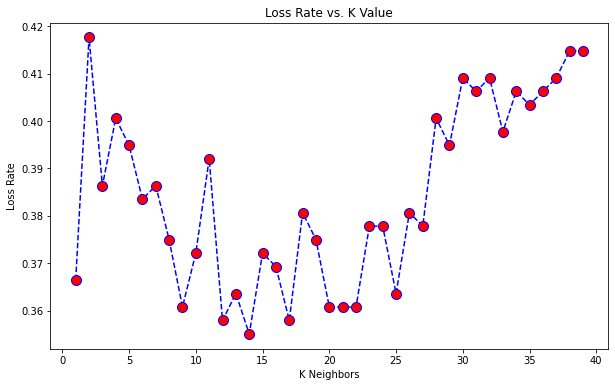

In [9]:
main()